In [ ]:
# using csv file as input


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sn

%matplotlib inline

In [2]:
# Read the input file and view few records
beer = pd.read_csv('beers.csv')
beer.head()

Brand         Brewery  PercentAlcohol  Calories  \
0                  Anchor Steam          Anchor             4.9       153   
1  Anheuser Busch Natural Light  Anheuser Busch             4.2        95   
2    Anheuser Busch Natural Ice  Anheuser Busch             5.9       157   
3                    Aspen Edge    Adolph Coors             4.1        94   
4                    Blatz Beer           Pabst             4.8       153   

   Carbohydrates  
0           16.0  
1            3.2  
2            8.9  
3            2.6  
4           12.5

In [4]:
from sklearn.cluster import KMeans

In [5]:
beer.columns

Index(['Brand', 'Brewery', 'PercentAlcohol', 'Calories', 'Carbohydrates'], dtype='object')

In [7]:
X=beer[['PercentAlcohol','Calories','Carbohydrates']]
type(X)

pandas.core.frame.DataFrame

In [13]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_scalar=scalar.fit_transform(X)


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [73]:
kmeans=KMeans(n_clusters=4,random_state=0).fit(X_scalar) #give scaled data as Input
centroids=kmeans.cluster_centers_
print(centroids)  #centroid

label=kmeans.labels_
print(label)

[[ 0.80850157  1.09238448  0.96073747]
 [-0.77819357 -1.29848644 -1.30109334]
 [ 0.07200675  0.10076122  0.10723088]
 [-5.828537   -2.57183645  0.53084307]]
[0 1 2 1 2 0 2 2 1 1 2 1 2 0 1 2 0 2 1 2 0 0 2 0 2 2 2 1 1 1 2 2 0 2 0 0 1
 1 0 2 0 2 2 1 0 1 1 0 2 1 2 1 1 2 1 2 3 1 2 0 2 2 0 0 2 0 0 0 0 2 2 0 0 0
 2 1 2 2 2 0 2 2 2 2 1 2]


In [82]:
## Elbow test
cluster_range = range(1,20)
cluster_errors=[]

for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(X_scalar)
    cluster_errors.append(clusters.inertia_)

In [76]:
clusters_df=pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df[0:10]

num_clusters  cluster_errors
0             1      258.000000
1             2      121.377419
2             3       88.235176
3             4       59.158907
4             5       39.846169
5             6       32.321725
6             7       27.230000
7             8       23.269067
8             9       20.404321
9            10       16.733457

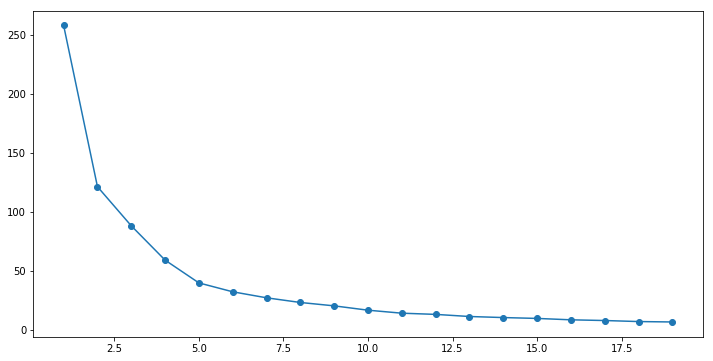

In [80]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker='o')
plt.show()